In [1]:
ls

LinearClassifier.ipynb               cs231n/
RunClassifiers.ipynb                 gradient_check.ipynb
SVM.ipynb                            k_Nearest Neighbor Classifier.ipynb
Softmax.ipynb


In [ ]:
# cd Documents/GitHub/machinelearningbasics/Stanfordcs231n/

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle
from random import randrange
import time 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# for ipython, use: %matplotlib osx

%load_ext autoreload
%autoreload 2

from cs231n.data_utils import load_CIFAR10
import import_ipynb
import LossF_SVM
import Linear_Classifier

importing Jupyter notebook from LossF_SVM.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(500, 3073) (100, 3073) (100, 3073) (50, 3073)
loss: 8.993332
(3073, 10)
grad: [[-31.36    56.4464 -14.7536]]
loss_v: 8.993332
(3073, 10)
grad_v: [[-31.36    56.4464 -14.7536]]
numerical: 19.979200 analytic: 19.979200, relative error: 1.167561e-11
numerical: 25.474800 analytic: 25.474800, relative error: 6.975018e-12
numerical: 72.830400 analytic: 72.830400, relative error: 1.914055e-12
numerical: -21.512800 analytic: -21.512800, relative error: 5.244484e-12
numerical: 1.378800 analytic: 1.378800, relative error: 8.412025e-13
numerical: 1.621600 analytic: 1.621600, relative error: 9.982559e-12
numerical: -5.053600 analytic: -5.053600, relative error: 7.506616e-12
numerical: 14.856400 analytic: 14.856400, relative error: 2.337743e-12
numerical: 14.798400 analytic: 14.798400, relative error: 7.121920e-12
numerical: 48.833600 analytic: 48.833600, relative

In [6]:
### Load the raw CIFAR-10 data.
cifar10_dir = '/Users/xiaoxiaoma/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which \
# may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)


### Subsample the data for more efficient code execution in this exercise
mask = 0
num_train = 500
num_test = 100
num_val = 100
num_dev = 50

mask = range(num_train, num_train + num_val)
X_val = X_train[mask]
y_val = y_train[mask]

mask = range(num_train)
X_train = X_train[mask]
y_train = y_train[mask]

mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]


### Reshape the image data into rows
# print (X_train.shape[0])
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))


### Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
# print(mean_image[:10]) # print a few of the elements
# plt.figure(figsize=(4,4))
# plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
# visualize the mean image
# plt.show()

# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

# third: append the bias dimension of ones (i.e. bias trick) so that our 
# SVM only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

# generate a random SVM weight matrix of small numbers, W
def init_W(X, y):
    W = np.random.rand(X.shape[1], np.max(y) + 1) * 0.001
    return W

(500, 3073) (100, 3073) (100, 3073) (50, 3073)


### Stochastic Gradient Descent

#### Linear Classifiler: SVM

In [104]:
%run LossF_SVM.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Clear previously loaded data.
(500, 3073) (100, 3073) (100, 3073) (50, 3073)
loss: 8.933813
(3073, 10)
grad: [[-24.8768 -83.18    17.42  ]]
loss_v: 8.933813
(3073, 10)
grad_v: [[-24.8768 -83.18    17.42  ]]
numerical: 9.879200 analytic: 9.879200, relative error: 1.557324e-11
numerical: -7.539200 analytic: -7.539200, relative error: 3.114138e-12
numerical: 56.671200 analytic: 56.671200, relative error: 2.339275e-12
numerical: 11.570400 analytic: 11.570400, relative error: 4.444577e-14
numerical: 3.240000 analytic: 3.240000, relative error: 4.289806e-11
numerical: 63.821600 analytic: 63.821600, relative error: 1.285502e-12
numerical: 12.836000 analytic: 12.836000, relative error: 1.990444e-12
numerical: 9.148400 analytic: 9.148400, relative error: 3.021412e-11
numerical: 29.020000 analytic: 29.020000, relative error: 3.944406e-12
numerical: 16.641600 analytic: 16.641600, relative error: 1.482774e-11
n

In [106]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, batch_size = 50, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 782.116003
iteration 100 / 1500: loss 467.532745
iteration 200 / 1500: loss 283.723086
iteration 300 / 1500: loss 171.389090
iteration 400 / 1500: loss 104.998404
iteration 500 / 1500: loss 64.507380
iteration 600 / 1500: loss 40.404228
iteration 700 / 1500: loss 25.367999
iteration 800 / 1500: loss 17.105300
iteration 900 / 1500: loss 11.542250
iteration 1000 / 1500: loss 8.384291
iteration 1100 / 1500: loss 6.210574
iteration 1200 / 1500: loss 5.291285
iteration 1300 / 1500: loss 4.343547
iteration 1400 / 1500: loss 3.827068
That took 1.143138s


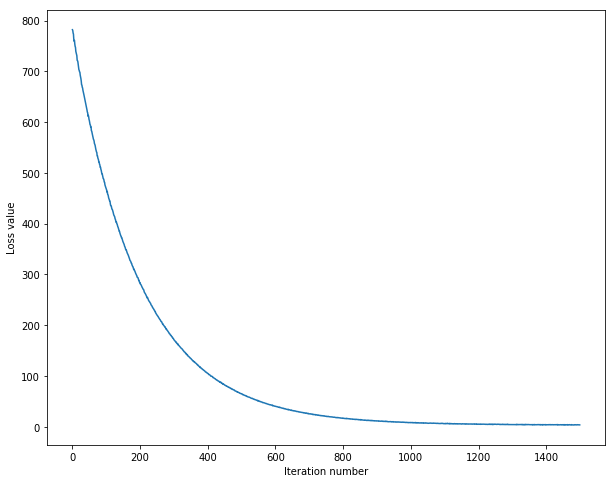

In [107]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [108]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.830000
validation accuracy: 0.310000


In [109]:
%run Linear_Classifier.ipynb

imported


In [117]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

################################################################################
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
##--------------------- written by me start ---------------------##
hyper = ()
best_hyper = ()
result = ()
svm = LinearSVM()
best_svm = LinearSVM()

for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        hyper = (learning_rate, regularization_strength)
        loss_hist_train = svm.train(X_train, y_train, learning_rate = learning_rate, \
                                    reg = regularization_strength,num_iters = 500, \
                                    batch_size = 200, verbose=True)
        
        y_train_pred = svm.predict(X_train)
        training_accuracy = np.mean(y_train == y_train_pred)
        
        y_val_pred = svm.predict(X_val)
        validation_accuracy = np.mean(y_val == y_val_pred)
        
        result = (training_accuracy, validation_accuracy)
        results[hyper] = result
        
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_hyper = hyper
        
final_loss = best_svm.train(X_train, y_train, learning_rate = best_hyper[0], \
                            reg = best_hyper[1], num_iters = 1500, batch_size = 200, \
                            verbose = True)        
final_y_val_pred = best_svm.predict(X_val)
best_val = np.mean(y_val == final_y_val_pred)

##--------------------- written by me end -----------------------##
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
print('best hyperparameters are: {0}'.format(best_hyper))

iteration 0 / 500: loss 795.069448
iteration 100 / 500: loss 470.113690
iteration 200 / 500: loss 284.349712
iteration 300 / 500: loss 172.857998
iteration 400 / 500: loss 105.196324
iteration 0 / 500: loss 128.068537
iteration 100 / 500: loss 49.235080
iteration 200 / 500: loss 20.644224
iteration 300 / 500: loss 10.158673
iteration 400 / 500: loss 6.468520
iteration 0 / 500: loss 3.281305
iteration 100 / 500: loss 1536.161674
iteration 200 / 500: loss 1471.448363
iteration 300 / 500: loss 1689.128085
iteration 400 / 500: loss 1117.627135
iteration 0 / 500: loss 2497.712402
iteration 100 / 500: loss 2020643812982138114188767486433074085888.000000
iteration 200 / 500: loss 333996239108923425831732000421638564909403173430842831777621542579336118272.000000
iteration 300 / 500: loss 55206903375152746640774017902953743147063927241336503431080304136958101374482191678715174910387256159209783296.000000
iteration 400 / 500: loss 91252589801752154442994073708033916975904919811776963246113372340

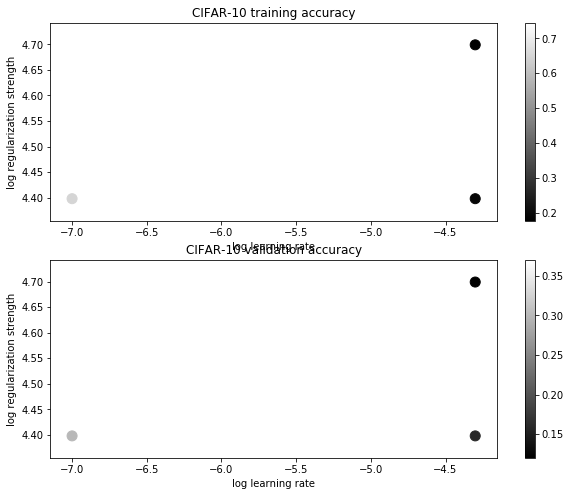

In [114]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('CIFAR-10 validation accuracy')
plt.show()

In [119]:
# Evaluate the best svm on test set
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.260000


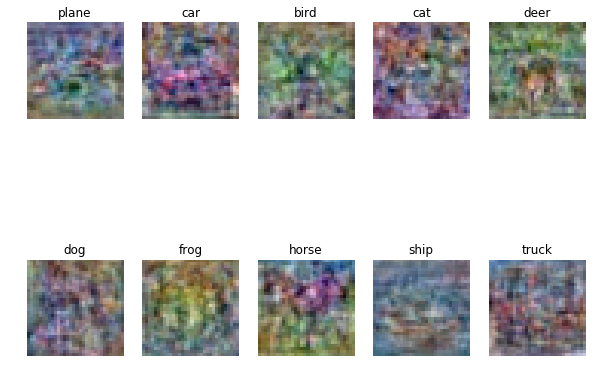

In [116]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
      
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])

#### Linear Classifier: softmax

In [121]:
%run LossF_Softmax.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Clear previously loaded data.
(500, 3073) (100, 3073) (100, 3073) (50, 3073)
loss_n: 16.178918
grad: [[  4.52150038  -0.73705545   3.94727531   2.63550557 -11.25153574]
 [  3.44880791   0.02168551   4.29482044   9.0591652  -11.72758929]]
loss_v: 16.178918
grad: [[  4.52150038  -0.73705545   3.94727531   2.63550557 -11.25153574]
 [  3.44880791   0.02168551   4.29482044   9.0591652  -11.72758929]]
numerical: -1.513407 analytic: -1.513359, relative error: 1.568379e-05
numerical: 0.195380 analytic: 0.195387, relative error: 1.836222e-05
numerical: -6.111904 analytic: -6.111879, relative error: 2.060156e-06
numerical: 0.312564 analytic: 0.312587, relative error: 3.740866e-05
numerical: 2.832961 analytic: 2.832992, relative error: 5.484992e-06
numerical: 4.948593 analytic: 4.948603, relative error: 1.045604e-06
numerical: -6.086886 analytic: -6.086880, relative error: 4.856693e-07
numerical: -2.142378 ana

In [122]:
%run Linear_Classifier.ipynb

imported


iteration 0 / 1500: loss 382.826756
iteration 100 / 1500: loss 230.889956
iteration 200 / 1500: loss 140.496426
iteration 300 / 1500: loss 85.597194
iteration 400 / 1500: loss 52.378536
iteration 500 / 1500: loss 32.661286
iteration 600 / 1500: loss 20.429005
iteration 700 / 1500: loss 13.136142
iteration 800 / 1500: loss 8.357368
iteration 900 / 1500: loss 5.818792
iteration 1000 / 1500: loss 4.387140
iteration 1100 / 1500: loss 3.230439
iteration 1200 / 1500: loss 2.808230
iteration 1300 / 1500: loss 2.423874
iteration 1400 / 1500: loss 2.230565
That took 0.935960s


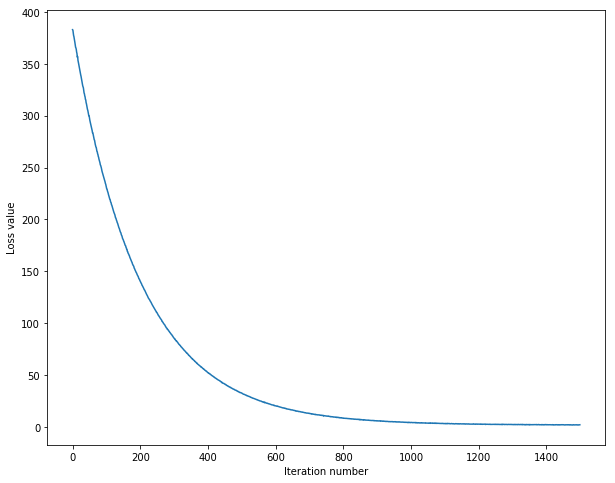

In [123]:
softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, batch_size = 50, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [126]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_softmax = None # The Softmax object that achieved the highest validation rate.

##--------------------- written by me start ---------------------##
hyper = ()
best_hyper = ()
result = ()
softmax = Softmax()
best_softmax = Softmax()

for learning_rate in learning_rates:
    for regularization_strength in regularization_strengths:
        hyper = (learning_rate, regularization_strength)
        loss_hist_train = softmax.train(X_train, y_train, learning_rate = learning_rate, \
                                    reg = regularization_strength, num_iters = 500, \
                                    batch_size = 50, verbose=True)
        
        y_train_pred = softmax.predict(X_train)
        training_accuracy = np.mean(y_train == y_train_pred)
        
        y_val_pred = softmax.predict(X_val)
        validation_accuracy = np.mean(y_val == y_val_pred)
        
        result = (training_accuracy, validation_accuracy)
        results[hyper] = result
        
        if validation_accuracy > best_val:
            best_val = validation_accuracy
            best_hyper = hyper
        
final_loss = best_softmax.train(X_train, y_train, learning_rate = best_hyper[0], \
                            reg = best_hyper[1], num_iters = 1500, batch_size = 200, \
                            verbose = True)        
final_y_val_pred = best_softmax.predict(X_val)
best_val = np.mean(y_val == final_y_val_pred)

##--------------------- written by me end -----------------------##
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)
print('best hyperparameters are: {0}'.format(best_hyper))

iteration 0 / 500: loss 396.676683
iteration 100 / 500: loss 240.043365
iteration 200 / 500: loss 145.674899
iteration 300 / 500: loss 89.155463
iteration 400 / 500: loss 54.408635
iteration 0 / 500: loss 65.483408
iteration 100 / 500: loss 25.279175
iteration 200 / 500: loss 10.528178
iteration 300 / 500: loss 5.199118
iteration 400 / 500: loss 3.145087
iteration 0 / 500: loss 2.096139
iteration 100 / 500: loss 148.160029
iteration 200 / 500: loss 147.470332
iteration 300 / 500: loss 116.255377
iteration 400 / 500: loss 152.252652
iteration 0 / 500: loss 187.016795


/Users/xiaoxiaoma/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


iteration 100 / 500: loss inf
iteration 200 / 500: loss inf
iteration 300 / 500: loss inf
iteration 400 / 500: loss inf
iteration 0 / 1500: loss 391.018737
iteration 100 / 1500: loss 236.055494
iteration 200 / 1500: loss 143.498173
iteration 300 / 1500: loss 87.462890
iteration 400 / 1500: loss 53.580601
iteration 500 / 1500: loss 33.194403
iteration 600 / 1500: loss 20.875595
iteration 700 / 1500: loss 13.312383
iteration 800 / 1500: loss 8.808086
iteration 900 / 1500: loss 6.010267
iteration 1000 / 1500: loss 4.476879
iteration 1100 / 1500: loss 3.332182
iteration 1200 / 1500: loss 2.770491
iteration 1300 / 1500: loss 2.311932
iteration 1400 / 1500: loss 2.208156
lr 1.000000e-07 reg 2.500000e+04 train accuracy: 0.354000 val accuracy: 0.380000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.466000 val accuracy: 0.270000
lr 5.000000e-05 reg 2.500000e+04 train accuracy: 0.140000 val accuracy: 0.080000
lr 5.000000e-05 reg 5.000000e+04 train accuracy: 0.118000 val accuracy: 0.100000
be

In [127]:
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.320000
